## **Homework 3**
### Engineering Image Analysis - Combustion Images
#### Step 1 - Train 2D CNN for Classifying Flames

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from matplotlib.pyplot import imshow
%matplotlib inline

#Load the data from the .mat file 
#NOTE: x data are single channel images sized at 250x100 pixels 
#      y data are classifiers for the x images stating stable (1) and unstable (0)

In [2]:
with h5py.File('combustion_img_13.mat', 'r') as f:
    print(list(f.keys())) #Print the available keys in the file
    train_set_x = np.array(f['train_set_x'])
    train_set_y = np.array(f['train_set_y'])
    valid_set_x = np.array(f['valid_set_x'])
    valid_set_y = np.array(f['valid_set_y'])
    test_set_x = np.array(f['test_set_x'])
    test_set_y = np.array(f['test_set_y'])    

['test_set_x', 'test_set_y', 'train_set_x', 'train_set_y', 'valid_set_x', 'valid_set_y']


In [3]:
print(train_set_x.shape)
print(train_set_y.shape)

(25000, 54000)
(54000, 1)


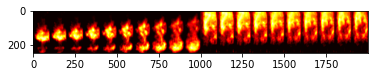

In [4]:
#By analyzing data in matlab, found a split point between y data 0 & 1 values to determine which value corresponds to stable/unstable
imgs = []
for i in range(5990, 6010):           
    sample_img = train_set_x[:, i]
    #print(f"initial shape: {sample_img.shape}")
    sample_img = sample_img.reshape(250, 100)
    #print(f"next shape: {sample_img.shape}")
    imgs.append(sample_img)
    
stacked = np.hstack(imgs)
imshow(stacked, cmap='hot')

In [5]:
# Preprocess the data via normalization and converting the labels to one-hot encoding:

import tensorflow as tf

# USING PYTORCH INSTEAD
# import torch as th
# if th.cuda.is_available():
#     th.backends.cudnn.deterministic = True
#     th.cuda.manual_seed(seed)
    
# #Define default device, we should use the GPU (cuda) if available
# device = th.device("cuda" if th.cuda.is_available() else "cpu")

# Preprocess the data
train_set_x = train_set_x.astype('float32') / 255
valid_set_x= valid_set_x.astype('float32') / 255
test_set_x = test_set_x.astype('float32') / 255

test_set_y = tf.keras.utils.to_categorical(test_set_y, num_classes=2)
valid_set_y = tf.keras.utils.to_categorical(valid_set_y, num_classes=2)
test_set_y = tf.keras.utils.to_categorical(test_set_y, num_classes=2)


2023-04-05 17:00:17.204549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

#May be able to use sigmoid instead of softmax for the activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_set_x, train_set_y, batch_size=32, epochs=2, validation_data=(valid_set_x, valid_set_y))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_set_x, test_set_y)
print("Test accuracy:", test_acc)


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# # Preprocess the data
# x_train = train_set_x.astype('float32') / 255
# x_val = valid_set_x.astype('float32') / 255
# x_test = test_set_x.astype('float32') / 255

# # Define the CNN model architecture
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(100, 250, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model with early stopping based on validation loss
# early_stop = EarlyStopping(monitor='val_loss', patience=3)
# model.fit(x_train, train_set_y, epochs=20, batch_size=32, validation_data=(valid_set_x, valid_set_y),
#           callbacks=[early_stop])

# # Evaluate the model on the testing set
# test_loss, test_acc = model.evaluate(x_test, y_test)
# print(f'Testing loss: {test_loss}, Testing accuracy: {test_acc}')

#### Step 2 - Train an autoencoder to allow a sequential model to operate

In [3]:
#PART 2:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from matplotlib.pyplot import imshow
%matplotlib inline

In [4]:
with h5py.File('combustion_img_13.mat', 'r') as f:
    print(list(f.keys())) #Print the available keys in the file
    train_set_x = np.array(f['train_set_x'])
    train_set_y = np.array(f['train_set_y'])
    valid_set_x = np.array(f['valid_set_x'])
    valid_set_y = np.array(f['valid_set_y'])
    test_set_x = np.array(f['test_set_x'])
    test_set_y = np.array(f['test_set_y'])    
    
train_set_x = train_set_x.astype('float32') / 255.
valid_set_x = valid_set_x.astype('float32') / 255.
test_set_x = test_set_x.astype('float32') / 255.

train_set_x = train_set_x.reshape(-1, 250, 100, 1)
valid_set_x = valid_set_x.reshape(-1, 250, 100, 1)
test_set_x = test_set_x.reshape(-1, 250, 100, 1)

['test_set_x', 'test_set_y', 'train_set_x', 'train_set_y', 'valid_set_x', 'valid_set_y']


In [3]:
# print(train_set_x.shape)
# print(valid_set_x.shape)
# print(test_set_x.shape)

(54000, 250, 100, 1)
(9000, 250, 100, 1)
(18000, 250, 100, 1)


In [5]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

input_img = Input(shape=(250, 100, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(encoded)
x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
decoded = Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

2023-04-05 18:56:23.002360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Evaluate the model on the test set
test_loss, test_acc = autoencoder.evaluate(test_set_x, test_set_y)
print("Test accuracy:", test_acc)

ValueError: in user code:

    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/losses.py", line 2176, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/home/exouser/.local/lib/python3.9/site-packages/keras/backend.py", line 5680, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 256, 104, 1) vs (None, 1)).


# TEST CODE:

In [ ]:
# import numpy as np
# import scipy.io as sio    
# import matplotlib.pyplot as plt

# # Load the data
# # data = sio.loadmat('combustion_img_13.mat')  #NOTE: Found out scipy.io doesn't support Matlab v7.3 data files

# import h5py
# with h5py.File('combustion_img_13.mat', 'r') as f:

# # print(list(f.keys())) #Print the available keys in the file
    
# # Get the training, validation, and testing sets
#     train_set_x = np.array(f['train_set_x'])
#     train_set_y = np.array(f['train_set_y'])
#     valid_set_x = np.array(f['valid_set_x'])
#     valid_set_y = np.array(f['valid_set_y'])
#     test_set_x = np.array(f['test_set_x'])
#     test_set_y = np.array(f['test_set_y'])  

# # Define the classes
# classes = ['stable', 'unstable']

# # Visualize a few images
# # fig, axs = plt.subplots(2, 5, figsize=(10, 5))
# # axs = axs.ravel()
# # for i in range(10):
# #     axs[i].imshow(train_set_x[i], cmap='gray')
# #     axs[i].set_title(classes[train_set_y[i][0]])
# #     axs[i].axis('off')
# plt.imshow(train_set_x[0], cmap = 'gray')
# plt.show()
